In [276]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.src.utils.data_utils import get_file
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import keras_vggface.utils
import PIL
import os
import os.path
from sklearn.utils.class_weight import compute_class_weight

In [20]:
vggface = VGGFace(model='vgg16')



580070376/580070376 [==============================] - 168s 0us/step


In [21]:
print(vggface.summary())
print(f"Inputs: {vggface.inputs}")
print(f"Outputs: {vggface.outputs}")

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [22]:
!mkdir public_images
!wget -O puiblic_images/scalia.jpg 'https://commons.wikimedia.org/wiki/File:Antonin_Scalia_Official_SCOTUS_Portrait.jpg'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [71]:
scalia_photo = plt.imread('public_images/sorvino.jpg')
scalia_photo.shape

(1365, 2048, 3)

In [72]:
face_detector = mtcnn.MTCNN()
face_roi = face_detector.detect_faces(scalia_photo)

1/1 [==============================] - 1s 605ms/step


In [73]:
face_roi

[{'box': [999, 157, 377, 496],
  'confidence': 0.999916672706604,
  'keypoints': {'left_eye': (1087, 349),
   'right_eye': (1259, 370),
   'nose': (1149, 456),
   'mouth_left': (1077, 515),
   'mouth_right': (1236, 540)}}]

In [74]:
x1, y1, width, height = face_roi[0]['box']
x2, y2 = x1 + width, y1 + height
face = scalia_photo[y1:y2, x1:x2]
print(face.shape)

(496, 377, 3)


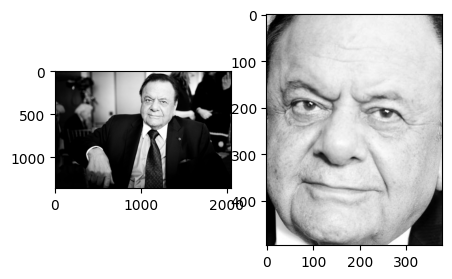

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,3))
axes[0].imshow(scalia_photo)
axes[1].imshow(face)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(496, 377, 3)
1/1 [==============================] - 0s 280ms/step


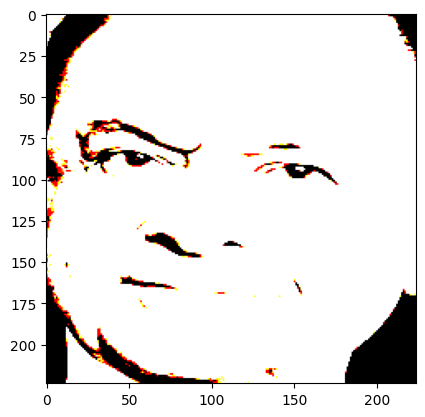

In [76]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np

def resize_image(image_array, target_size):
    image = Image.fromarray(image_array)
    resized_image = image.resize(target_size)
    return np.array(resized_image)


print(face.shape)
# Assuming face_array is your input image data
face_array_resized = resize_image(face, target_size=(224, 224))

# Expand dimensions to create a batch of size 1
face_array_expanded = np.expand_dims(face_array_resized, axis=0)
plt.imshow(face_array_expanded[0])

# Preprocess the input data for VGG16
face_array_preprocessed = preprocess_input(face_array_expanded)
plt.imshow(face_array_preprocessed[0])

predictions = vggface.predict(face_array_expanded)

In [104]:
names = decode_predictions(predictions, top = 2622)

In [96]:
from keras_vggface.utils import decode_predictions

In [106]:
(names[0])

[["b'Paul_Sorvino'", 0.99999785],
 ["b'David_Jason'", 2.1520336e-06],
 ["b'Om_Puri'", 3.5294708e-08],
 ["b'Karl_Malden'", 3.2858402e-08],
 ["b'Adam_Garcia'", 3.0942044e-09],
 ["b'Don_Rickles'", 1.3614794e-09],
 ["b'Tom_Wilkinson'", 9.17474e-10],
 ["b'Vincent_Pastore'", 8.4349333e-10],
 ["b'Ernest_Borgnine'", 6.7434636e-10],
 ["b'Rowan_Atkinson'", 4.204012e-10],
 ["b'Reginald_VelJohnson'", 3.899245e-10],
 ["b'Stacy_Keach'", 2.4424696e-10],
 ["b'Jerry_Orbach'", 2.3206137e-10],
 ["b'Jeff_Garlin'", 1.9185939e-10],
 ["b'Eli_Wallach'", 1.8262435e-10],
 ["b'Jack_Davenport'", 1.642924e-10],
 ["b'Charles_Durning'", 1.4663896e-10],
 ["b'Ralf_Little'", 1.1755835e-10],
 ["b'Daniel_Auteuil'", 1.1199944e-10],
 ["b'Ron_Lester'", 1.0251215e-10],
 ["b'Naseeruddin_Shah'", 9.452657e-11],
 ["b'Steven_Mackintosh'", 8.038541e-11],
 ["b'Aaron_Staton'", 7.779312e-11],
 ["b'Warren_Brown'", 7.174816e-11],
 ["b'Mark_Valley'", 6.611844e-11],
 ["b'Armand_Assante'", 6.3317525e-11],
 ["b'Paul_Giamatti'", 6.275557e-1

In [ ]:
https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset/
https://www.kaggle.com/datasets/rishabkoul1/vechicle-dataset

## Fine Tuning

In [320]:
from functools import wraps
from deepface.commons import functions
import sys
import io

# https://stackoverflow.com/questions/75231091/deepface-dont-print-logs-from-mtcnn-backend
def capture_output(func):
    """Wrapper to capture print output."""

    @wraps(func)
    def wrapper(*args, **kwargs):
        old_stdout = sys.stdout
        new_stdout = io.StringIO()
        sys.stdout = new_stdout
        try:
            return func(*args, **kwargs)
        finally:
            sys.stdout = old_stdout

    return wrapper

def resize_image(image_array, target_size):
        image = Image.fromarray(image_array)
        resized_image = image.resize(target_size)
        return np.array(resized_image)


face_detector_model = mtcnn.MTCNN()
w_detect_faces = capture_output(face_detector_model.detect_faces)


def preprocess_image(image_original, label, face_detector_model = face_detector_model):
    # Have to convert image to certain type for resize to work for some reason --> uint8
    # https://stackoverflow.com/questions/68429181/cv2-error-opencv4-5-2-c-users-modules-imgproc-src-resize-cpp3929-err
    # https://stackoverflow.com/questions/60138697/typeerror-cannot-handle-this-data-type-1-1-3-f4
    
    if not face_detector_model:
        face_detector_model = mtcnn.MTCNN()
    
    # Ensure the image has 3 channels (for RGB)
    if image_original.shape[-1] != 3:
        print("Invalid number of channels in the image.")
        return []

    image2 = np.array(image_original,dtype=np.uint8)

    face_roi = w_detect_faces(image2)

    if not face_roi:
         print("No face detected, moving on.")
         return image_original, label
    else:
        x1, y1, width, height = face_roi[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = image2[y1:y2, x1:x2]
        
    # Assuming face_array is your input image data
    face_array_resized = resize_image(face, target_size=(224, 224))

    # Expand dimensions to create a batch of size 1
    face_array_expanded = np.expand_dims(face_array_resized, axis=0)

    # Preprocess the input data for VGG16 (imported)
    face_array_preprocessed = preprocess_input(face_array_expanded)

    return face_array_preprocessed, label

def preprocess_image2(image, label):
    # Your preprocessing logic here
    # Modify the image data and label as needed
    
    # Example: Convert image to grayscale
    image = tf.image.rgb_to_grayscale(image)
    
    # Example: Normalize image pixel values
    image = image / 255.0
    
    # Example: Resize image
    image = tf.image.resize(image, (224, 224))
    
    return image, label

def preprocess_photo(photo_path = 'training/ravi/DSC_9548.JPG', label = None, face_detector_model = face_detector):
    initial_photo = plt.imread(photo_path)
    
    if not face_detector_model:
        face_detector_model = mtcnn.MTCNN()
    
    #face_roi = face_detector_model.detect_faces(initial_photo)
    face_roi = w_detect_faces(initial_photo)

    x1, y1, width, height = face_roi[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = initial_photo[y1:y2, x1:x2]

    # Assuming face_array is your input image data
    face_array_resized = resize_image(face, target_size=(224, 224))

    # Expand dimensions to create a batch of size 1
    face_array_expanded = np.expand_dims(face_array_resized, axis=0)

    # Preprocess the input data for VGG16
    face_array_preprocessed = preprocess_input(face_array_expanded)

    return face_array_preprocessed, label



In [362]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a function to load and preprocess each image
def load_and_preprocess_image(file_path = 'training/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg', label = 0):
    '''
    
    Takes in filepath to an image and preprocesses it such that it can be ran through VGG16 facial detection.

    Arguments:
        - file_path (str): full path to the target image
        - label (int): label for the image dataset

    Return:
        - face_array_preprocessed
        - label (int): label for the image dataset
    '''
    image = load_img(file_path)
    image = img_to_array(image, dtype=np.uint8)
    # print(image.shape)

    face_roi = w_detect_faces(image)
    if not face_roi:
            print("No face detected, moving on.")
            # Not an actual face, var name used for simplicity
            face = resize_image(image, target_size=(224, 224))

    else:
        x1, y1, width, height = face_roi[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = image[y1:y2, x1:x2]
            
    # Assuming face_array is your input image data
    face_array_resized = resize_image(face, target_size=(224, 224))

    # Expand dimensions to create a batch of size 1
    face_array_expanded = np.expand_dims(face_array_resized, axis=0)
    
    # Preprocess the input data for VGG16 (imported)
    # For some reason, this function is darkening the image and/or making it appear blue
    # The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
    face_array_preprocessed = preprocess_input(face_array_expanded)

    return face_array_preprocessed, label

testing_image, testing_label = load_and_preprocess_image()
# print(type(testing_image))
# print(testing_image.shape)
# plt.imshow(testing_image[0])

In [398]:
def custom_image_dataset(dir_path = 'training', preprocessing_function = load_and_preprocess_image, batch_size=8, shuffle=True):
    file_list = []
    labels = []
    
    # Iterate through the directories in the main directory
    for label in os.listdir(dir_path):
        label_path = os.path.join(dir_path, label)
        
        # Iterate through the files in each subdirectory
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            
            # Append file path and corresponding label
            file_list.append(file_path)
            labels.append(label)
    
    # Apply the load_and_preprocess_image function to each element in the dataset
    preprocessed_data = [
        preprocessing_function(file_path, label)
        for file_path, label in zip(file_list, labels)
    ]

    # Unpack the preprocessed data
    preprocessed_images, preprocessed_labels = zip(*preprocessed_data)

    # Flatten the nested list
    preprocessed_images = [item for sublist in preprocessed_images for item in sublist]
    # Create a mapping from labels to integers
    label_to_index = {label: idx for idx, label in enumerate(set(preprocessed_labels))}

    # Use the mapping to convert labels to integers
    post_processed_labels = [label_to_index[label] for label in preprocessed_labels]

    # Create a dataset from the preprocessed data
    dataset = tf.data.Dataset.from_tensor_slices((preprocessed_images, preprocessed_labels))

    # Shuffle the dataset if specified
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(file_list))

    # Batch the dataset
    dataset = dataset.batch(batch_size)
    
    return dataset, label_to_index

In [399]:
dataset = custom_image_dataset()

No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detect

In [462]:
# Unpack the preprocessed data
preprocessed_images, preprocessed_labels = zip(*dataset)

# Flatten the nested list
preprocessed_images = [item for sublist in preprocessed_images for item in sublist]
# Create a mapping from labels to integers
label_to_index = {label: idx for idx, label in enumerate(set(preprocessed_labels))}
# Output: {'cat': 0, 'dog': 1, 'bird': 2, 'elephant': 3}

# Use the mapping to convert labels to integers
labels_as_int = [label_to_index[label] for label in preprocessed_labels]
# Output: [0, 1, 1, 2, 3, 1, 0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


263
rdj
2


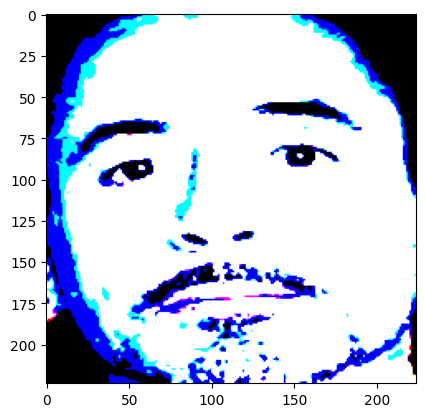

In [467]:
print(len(preprocessed_labels))
i = 50
print(preprocessed_labels[i])
print(labels_as_int[i])
plt.imshow(preprocessed_images[i])

In [468]:
new_dataset = tf.data.Dataset.from_tensor_slices((preprocessed_images, labels_as_int))

In [473]:
new_dataset = new_dataset.shuffle(buffer_size=len(labels_as_int))
# Batch the dataset
new_dataset = new_dataset.batch(8)

In [480]:
# Iterate over the dataset
for batch in new_dataset:
    images, labels = batch
    break
    # Print the contents of the batch
    # print(f"Batch images shape: {images.shape}")
    # print(f"Batch labels: {labels}")


# Testing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


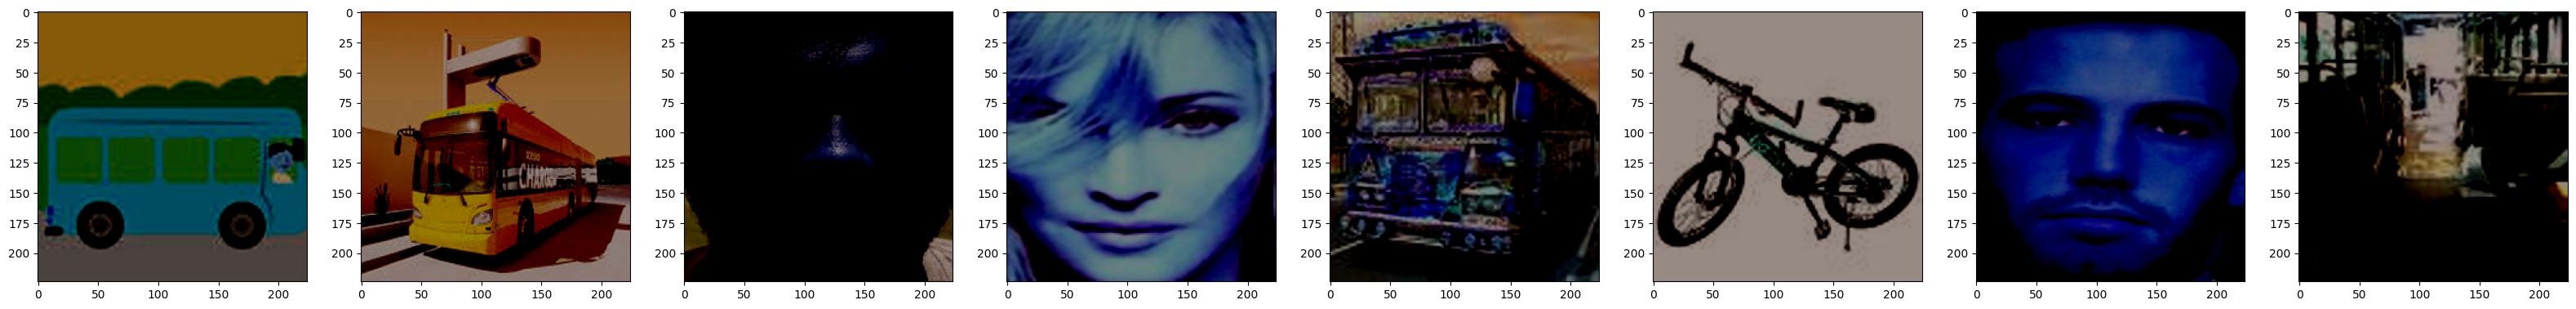

In [481]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(10*4,6))
for i in range(8):
    axes[i].imshow(np.array(images[i],np.int32))

plt.show()

In [132]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)                                                                                                                                                                         
])

In [131]:
vggface_foundation = VGGFace(model='vgg16', include_top=False, input_shape = (224, 224, 3))

58909280/58909280 [==============================] - 19s 0us/step


In [482]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Add, Dense, Activation, BatchNormalization, Lambda, ReLU, PReLU, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

# Number of new classes + 1 for the unknown class
number_classes = 4
                                                        
# Freeze Base model to only train fine tuning layers
vggface_foundation.trainable = False
last_layer = vggface_foundation.get_layer('pool5').output

# Building fine tuning model
inputs = tf.keras.Input(shape=(224,224,3))

x = data_augmentation(inputs)
x = vggface_foundation(x)
x = Flatten(name = 'flatten')(x)
out = Dense(number_classes, name = 'personalized_classifier')(x)
custom_vgg_model = Model(inputs, out)

In [483]:
custom_vgg_model.summary()

Model: "model_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_90 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vggface_vgg16 (Functional)  (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 personalized_classifier (D  (None, 4)                 100356    
 ense)                                                           
                                                                 
Total params: 14815044 (56.51 MB)
Trainable params: 100356 (392.02 KB)
Non-trainable params: 14714688 (56.13 MB)
___________

In [484]:
learning_rate = 0.0001
custom_vgg_model.compile(optimizer=Adam(learning_rate = learning_rate),
                        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                        metrics = ['accuracy'])

In [485]:
from sklearn.utils.class_weight import compute_class_weight

# Extract labels from the dataset
train_labels = np.concatenate([label_tensor.numpy() for _, label_tensor in new_dataset])

# Get unique class labels
class_labels = np.unique(train_labels)

# Compute class weights
class_weights = compute_class_weight('balanced', classes = class_labels, y = train_labels)
class_weight_dict = dict(zip(class_labels, class_weights))

print("Class Labels:", class_labels)
print("Class Weights:", class_weight_dict)


Class Labels: [0 1 2 3]
Class Weights: {0: 2.7395833333333335, 1: 0.3354591836734694, 2: 3.460526315789474, 3: 2.7395833333333335}


In [487]:
history = custom_vgg_model.fit(new_dataset, epochs = 20, class_weight=class_weight_dict) # 

Epoch 1/20
33/33 [==============================] - 69s 2s/step - loss: 2.0573 - accuracy: 0.8061
Epoch 2/20
33/33 [==============================] - 55s 2s/step - loss: 0.4399 - accuracy: 0.9316
Epoch 3/20
33/33 [==============================] - 54s 2s/step - loss: 0.7620 - accuracy: 0.8745
Epoch 4/20
33/33 [==============================] - 54s 2s/step - loss: 0.3970 - accuracy: 0.8935
Epoch 5/20
33/33 [==============================] - 53s 2s/step - loss: 0.2252 - accuracy: 0.9354
Epoch 6/20
33/33 [==============================] - 54s 2s/step - loss: 0.2385 - accuracy: 0.9354
Epoch 7/20
33/33 [==============================] - 54s 2s/step - loss: 0.3900 - accuracy: 0.9278
Epoch 8/20
33/33 [==============================] - 58s 2s/step - loss: 0.4084 - accuracy: 0.9316
Epoch 9/20
33/33 [==============================] - 56s 2s/step - loss: 0.7497 - accuracy: 0.8631
Epoch 10/20
33/33 [==============================] - 55s 2s/step - loss: 0.5523 - accuracy: 0.9240
Epoch 11/20
33/33 [

In [498]:
prob_model = Sequential([
    custom_vgg_model,
    tf.keras.layers.Softmax()
])

In [512]:
def resize_image(image_array, target_size):
        image = Image.fromarray(image_array)
        resized_image = image.resize(target_size)
        return np.array(resized_image)

def preprocess_photo(photo_path = 'training/ravi/headshot.JPG', model = prob_model, face_detector_model = face_detector):
    initial_photo = plt.imread(photo_path)
    print(initial_photo.shape)

    if not face_detector_model:
        face_detector_model = mtcnn.MTCNN()
    
    face_roi = face_detector_model.detect_faces(initial_photo)

    x1, y1, width, height = face_roi[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = initial_photo[y1:y2, x1:x2]
    print(face.shape)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,3))
    axes[0].imshow(initial_photo)
    axes[1].imshow(face)
    plt.show()

    # Assuming face_array is your input image data
    face_array_resized = resize_image(face, target_size=(224, 224))

    # Expand dimensions to create a batch of size 1
    face_array_expanded = np.expand_dims(face_array_resized, axis=0)
    plt.imshow(face_array_expanded[0])

    # Preprocess the input data for VGG16
    face_array_preprocessed = preprocess_input(face_array_expanded)
    plt.imshow(face_array_preprocessed[0])

    return face_array_preprocessed


(800, 800, 3)
1/1 [==============================] - 0s 57ms/step
(206, 153, 3)


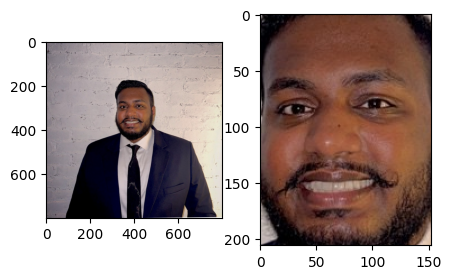

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


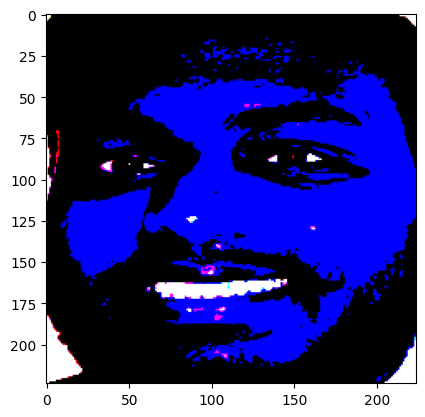

In [513]:
ravi_sample = preprocess_photo()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'ravi': 0, 'unknown': 1, 'rdj': 2, 'madonna': 3}
(224, 224, 3)
1/1 [==============================] - 0s 229ms/step
[[1.0000000e+00 5.4096825e-38 9.1008214e-26 2.9405457e-36]]


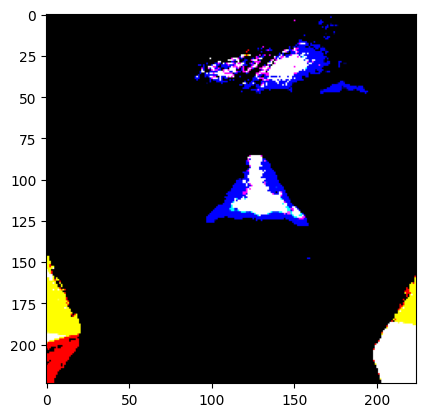

In [510]:
print(label_to_index)
j = 2
img = np.expand_dims(images[j], axis=0)  # new shape: (1, 720, 1280, 3)

print(images[j].shape)
plt.imshow(images[j])
predictions = prob_model.predict(img)
print(predictions)



In [516]:
print(label_to_index)
j = 2
img = np.expand_dims(ravi_sample, axis=0)  # new shape: (1, 720, 1280, 3)

predictions = prob_model.predict(ravi_sample)
print(predictions)



{'ravi': 0, 'unknown': 1, 'rdj': 2, 'madonna': 3}
1/1 [==============================] - 0s 326ms/step
[[1. 0. 0. 0.]]
